# Interpretable Machine Learning for Breast Cancer Diagnosis

In [1]:
# Imports
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

## 2. Dataset
We use the Breast Cancer Wisconsin Diagnostic dataset provided by scikit-learn.

In [2]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print(X.shape)
print(y.value_counts())

(569, 30)
1    357
0    212
Name: count, dtype: int64


## 3. Methodology
The workflow includes splitting the dataset into training and test sets, training classification models, evaluating performance using ROC-AUC and confusion matrices, and interpreting model predictions.

In [3]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=5000))
])

model.fit(X_train, y_train)

y_proba = model.predict_proba(X_test)[:, 1]
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

ROC-AUC: 0.9953703703703703


In [4]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf_model.fit(X_train, y_train)

rf_proba = rf_model.predict_proba(X_test)[:, 1]
print("Random Forest ROC-AUC:", roc_auc_score(y_test, rf_proba))

Random Forest ROC-AUC: 0.9930555555555556


### 3.1 Confusion Matrix
The confusion matrix is used to analyze classification errors, which is especially important in medical applications.

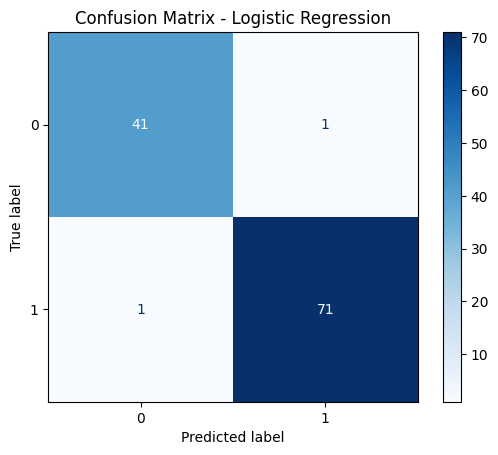

In [5]:
## Confusion Matrix (Logistic Regression)

# Predictions from Logistic Regression
y_pred = model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display it
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

## 4. Model Interpretability
Permutation importance is applied to identify the most influential features affecting model predictions.

In [6]:
## Model Interpretability (Permutation Importance)

result = permutation_importance(
    model,
    X_test,
    y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

importances = pd.Series(
    result.importances_mean,
    index=X.columns
).sort_values(ascending=False)

importances.head(10)

,0
radius error,0.037719
worst texture,0.031579
area error,0.028947
worst area,0.028070
worst smoothness,0.027193
worst radius,0.024561
perimeter error,0.021930
mean concave points,0.020175
worst perimeter,0.018421
worst concave points,0.018421


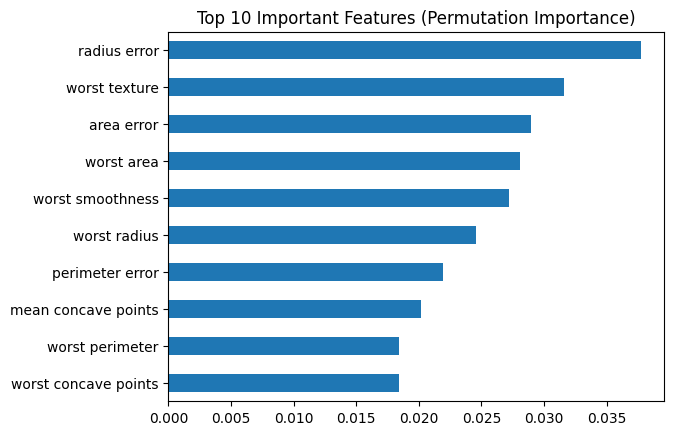

In [7]:

importances.head(10).plot(
    kind="barh",
    title="Top 10 Important Features (Permutation Importance)"
)
plt.gca().invert_yaxis()
plt.show()

## 5. Results, Limitations, and Conclusion

**Results:** The Logistic Regression model achieved strong ROC-AUC performance, indicating effective separation between malignant and benign tumors.

**Limitations:** This project uses a single curated dataset and classical machine learning models. Future work could include validation on external clinical datasets.

**Conclusion:** This project highlights the importance of interpretable machine learning techniques in healthcare-focused applications.